<a href="https://colab.research.google.com/github/NUKALAMOHANSAIGUPTA/DATAMINING/blob/main/ADM_labassignment_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
# create a synthetic dataset
np.random.seed(42)
data=np.random.normal(0, 1, 100) #normal distribution
outliers = np.random.uniform(5, 10, 5) #artificial
data_with_outliers = np.concatenate([data, outliers])

In [7]:
data

array([ 0.49671415, -0.1382643 ,  0.64768854,  1.52302986, -0.23415337,
       -0.23413696,  1.57921282,  0.76743473, -0.46947439,  0.54256004,
       -0.46341769, -0.46572975,  0.24196227, -1.91328024, -1.72491783,
       -0.56228753, -1.01283112,  0.31424733, -0.90802408, -1.4123037 ,
        1.46564877, -0.2257763 ,  0.0675282 , -1.42474819, -0.54438272,
        0.11092259, -1.15099358,  0.37569802, -0.60063869, -0.29169375,
       -0.60170661,  1.85227818, -0.01349722, -1.05771093,  0.82254491,
       -1.22084365,  0.2088636 , -1.95967012, -1.32818605,  0.19686124,
        0.73846658,  0.17136828, -0.11564828, -0.3011037 , -1.47852199,
       -0.71984421, -0.46063877,  1.05712223,  0.34361829, -1.76304016,
        0.32408397, -0.38508228, -0.676922  ,  0.61167629,  1.03099952,
        0.93128012, -0.83921752, -0.30921238,  0.33126343,  0.97554513,
       -0.47917424, -0.18565898, -1.10633497, -1.19620662,  0.81252582,
        1.35624003, -0.07201012,  1.0035329 ,  0.36163603, -0.64

In [6]:
outliers

array([7.08705502, 6.11053905, 5.59932684, 6.68807586, 9.71454852])

In [5]:
data_with_outliers

array([ 4.96714153e-01, -1.38264301e-01,  6.47688538e-01,  1.52302986e+00,
       -2.34153375e-01, -2.34136957e-01,  1.57921282e+00,  7.67434729e-01,
       -4.69474386e-01,  5.42560044e-01, -4.63417693e-01, -4.65729754e-01,
        2.41962272e-01, -1.91328024e+00, -1.72491783e+00, -5.62287529e-01,
       -1.01283112e+00,  3.14247333e-01, -9.08024076e-01, -1.41230370e+00,
        1.46564877e+00, -2.25776300e-01,  6.75282047e-02, -1.42474819e+00,
       -5.44382725e-01,  1.10922590e-01, -1.15099358e+00,  3.75698018e-01,
       -6.00638690e-01, -2.91693750e-01, -6.01706612e-01,  1.85227818e+00,
       -1.34972247e-02, -1.05771093e+00,  8.22544912e-01, -1.22084365e+00,
        2.08863595e-01, -1.95967012e+00, -1.32818605e+00,  1.96861236e-01,
        7.38466580e-01,  1.71368281e-01, -1.15648282e-01, -3.01103696e-01,
       -1.47852199e+00, -7.19844208e-01, -4.60638771e-01,  1.05712223e+00,
        3.43618290e-01, -1.76304016e+00,  3.24083969e-01, -3.85082280e-01,
       -6.76922000e-01,  

In [3]:
#convert to dataframe
df=pd.DataFrame(data_with_outliers, columns=['Value'])

In [4]:
df

,Value
0,0.496714
1,-0.138264
2,0.647689
3,1.523030
4,-0.234153
...,...
100,7.087055
101,6.110539
102,5.599327
103,6.688076


In [8]:
#step1 : detect outliers using IQR methods
Q1 = df['Value'].quantile(0.25)
Q3 = df['Value'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [9]:
Q1

-0.5622875292409727

In [11]:
Q3

0.6116762888408679

In [12]:
IQR

1.1739638180818406

In [13]:
lower_bound

-2.3232332563637335

In [14]:
upper_bound

2.372622015963629

In [15]:
#identifing ouliers based on IRQ
outliers_iqr=df[(df['Value']<lower_bound) | (df['Value']>upper_bound)]

In [16]:
outliers_iqr

,Value
74,-2.619745
100,7.087055
101,6.110539
102,5.599327
103,6.688076
104,9.714549


In [17]:
#step:2 detect outliers using z-score method
z_scores=stats.zscore(df['Value'])
outliers_zscore=df[np.abs(z_scores)>3]

In [18]:
z_scores

,Value
0,0.145800
1,-0.209754
2,0.230337
3,0.720481
4,-0.263446
...,...
100,3.836033
101,3.289237
102,3.002986
103,3.612626


In [19]:
outliers_zscore

,Value
100,7.087055
101,6.110539
102,5.599327
103,6.688076
104,9.714549


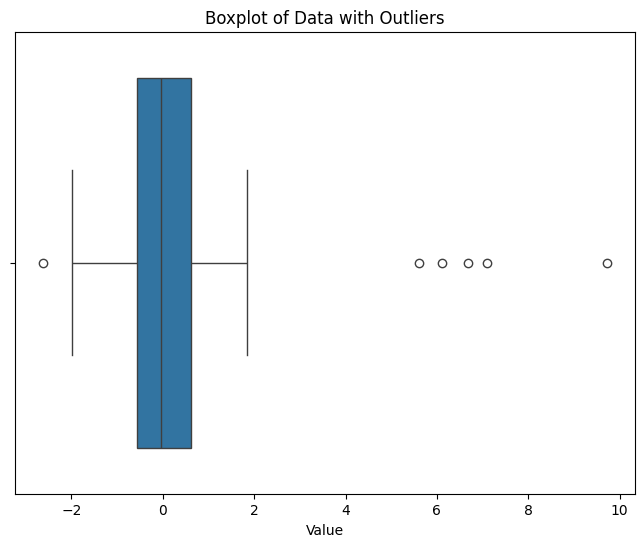

In [20]:
#step:3 visualize outliers using a boxplot
plt.figure(figsize=(8,6))
sns.boxplot(x=df['Value'])
plt.title('Boxplot of Data with Outliers')
plt.show()

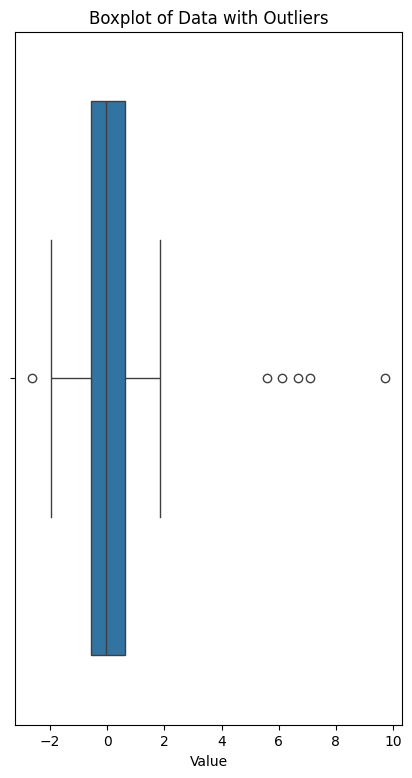

In [31]:
#step:3 visualize outliers using a boxplot
plt.figure(figsize=(5,9))
sns.boxplot(x=df['Value'])
plt.title('Boxplot of Data with Outliers')
plt.show()

In [32]:
#step4: handle outliers
#capturing set outliers to the upper and lower bounds
df_capped=df.copy()
df_capped['Value']=np.clip(df_capped['Value'], lower_bound, upper_bound)

In [33]:
df_capped

,Value
0,0.496714
1,-0.138264
2,0.647689
3,1.523030
4,-0.234153
...,...
100,2.372622
101,2.372622
102,2.372622
103,2.372622


In [34]:
df_capped['Value']

,Value
0,0.496714
1,-0.138264
2,0.647689
3,1.523030
4,-0.234153
...,...
100,2.372622
101,2.372622
102,2.372622
103,2.372622


In [39]:
#removal : drop rows with outliers
df_removed=df.copy()
df_removed=df_removed[(df_removed['Value']>=lower_bound) & (df_removed['Value']<=upper_bound)]

In [40]:
df_removed

,Value
0,0.496714
1,-0.138264
2,0.647689
3,1.523030
4,-0.234153
...,...
95,-1.463515
96,0.296120
97,0.261055
98,0.005113


In [41]:
#imputation: replace outliers with the median
df_imputed=df.copy()
median_value=df['Value'].median()
df_imputed['Value']=np.where((df_imputed['Value']<lower_bound) | (df_imputed['Value']>upper_bound), median_value, df_imputed['Value'])

In [42]:
df_imputed

,Value
0,0.496714
1,-0.138264
2,0.647689
3,1.523030
4,-0.234153
...,...
100,-0.035826
101,-0.035826
102,-0.035826
103,-0.035826


In [43]:
median_value

-0.03582603910995154

In [44]:
df_imputed['Value']

,Value
0,0.496714
1,-0.138264
2,0.647689
3,1.523030
4,-0.234153
...,...
100,-0.035826
101,-0.035826
102,-0.035826
103,-0.035826


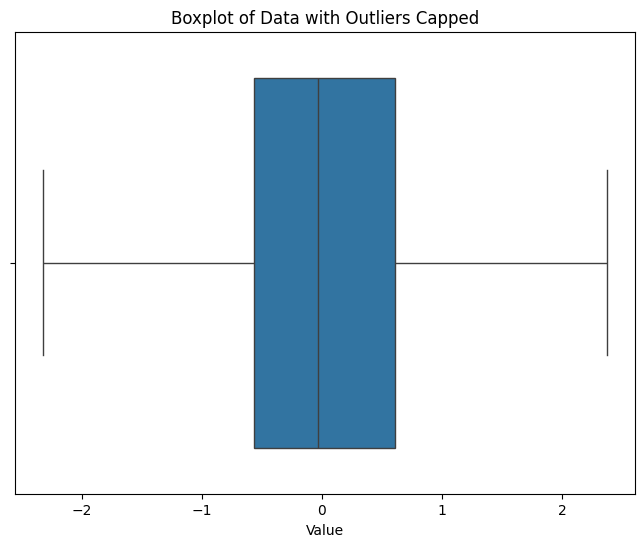

In [45]:
#step:5 visualize handled data
plt.figure(figsize=(8,6))
sns.boxplot(x=df_capped['Value'])
plt.title('Boxplot of Data with Outliers Capped')
plt.show()